# Imports

In [2]:
%load_ext autoreload

In [3]:
import numpy as np
from src import *

%autoreload 2

# Signal

In [32]:
# Signal width
N = 128

# Sparse signal parameters
sparse_range = (-6, 6)
density = 0.005

# Smooth signal parameters
smooth_amplitude = 2
sigmas_range = (2e-2, 2e-1)
nb_gaussian = int(0.5 * N)

# Seed
seed = None

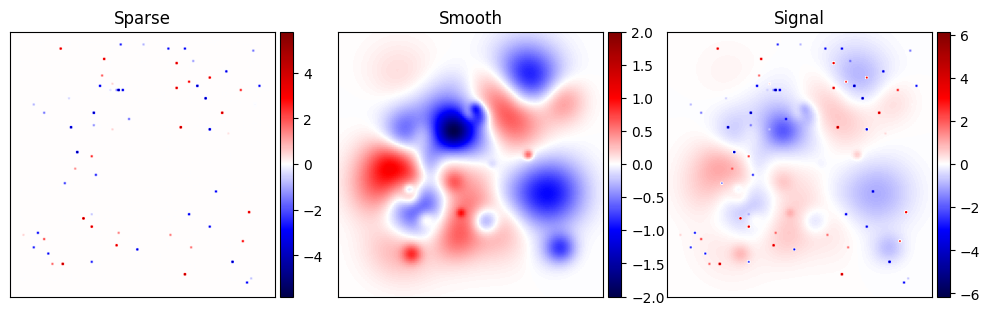

In [33]:
sparse_signal = compute_sparse(N, sparse_range, density, seed)
smooth_signal = compute_smooth(N, smooth_amplitude, sigmas_range, nb_gaussian, seed)

signal = sparse_signal + smooth_signal

plot_signal(sparse_signal, smooth_signal)

# Operator $\phi$

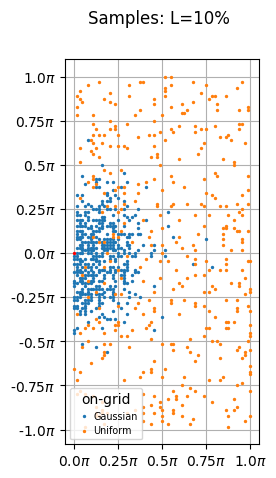

In [34]:
L = 0.1
theta = 0.5
op = NuFFT(N, L, theta, on_grid=True, seed=seed)

x0 = signal.reshape(-1)
y0 = op(x0)

psnr = 50
y = compute_y(y0, psnr)

op.plot_samples()

# Solver

In [35]:
# Loss weights
lambda1 = 1e-2
lambda2 = 5e-2

# Use Laplacian ?
laplacian = True

### Coupled

In [36]:
coupled = True

x1, x2 = solve(y, op, lambda1, lambda2, coupled, laplacian)

Coupled
INFO -- [2023-12-14 13:41:15.964759] Iteration 0
	iteration: 0
	N_iter: 1.0
	RelError[x]: 0.0
INFO -- [2023-12-14 13:41:35.630315] Iteration 500
	iteration: 500
	N_iter: 501.0
	RelError[x]: 0.0005764315473026887
INFO -- [2023-12-14 13:41:40.549707] Iteration 634
	iteration: 634
	N_iter: 635.0
	RelError[x]: 9.93758486360439e-05
INFO -- [2023-12-14 13:41:40.550662] Stopping Criterion satisfied -> END


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1504265c0>


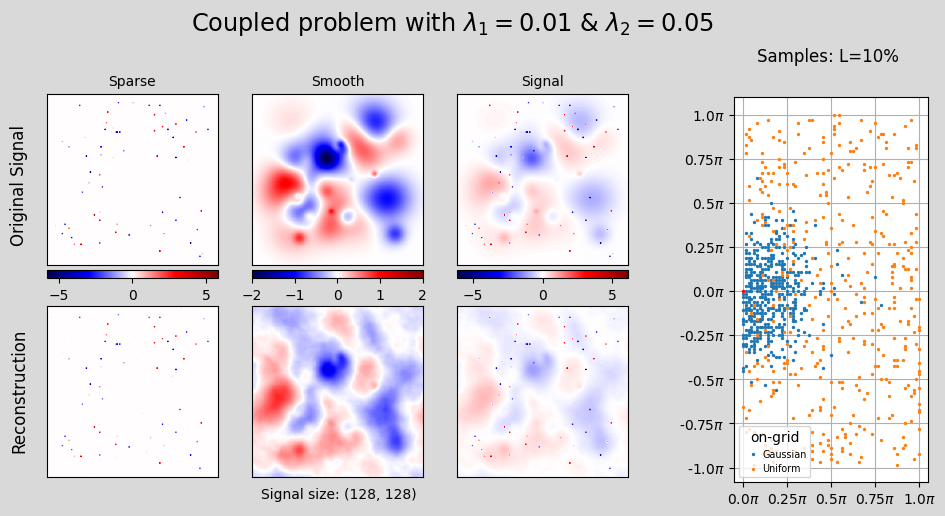

Button(description='SAVE', style=ButtonStyle())

Output()

In [37]:
sparse_rcstr, smooth_rcstr, signal_rcstr = map(
    lambda x: x.reshape((N,N)), (x1, x2, x1 + x2)
)

fig = plot_results(
    [sparse_signal, smooth_signal],
    [sparse_rcstr, smooth_rcstr],
    lambda1,
    lambda2,
    op,
    coupled,
)

save_widget(fig, lambda1, lambda2, op, psnr, coupled)

### Decoupled

In [38]:
coupled = False

x1_, x2_ = solve(y, op, lambda1, lambda2, coupled, laplacian)

Decoupled
Co-Gram Identity
INFO -- [2023-12-14 13:41:47.476257] Iteration 0
	iteration: 0
	N_iter: 1.0
	RelError[x]: 0.0
INFO -- [2023-12-14 13:41:48.920386] Iteration 180
	iteration: 180
	N_iter: 181.0
	RelError[x]: 9.494023424185304e-05
INFO -- [2023-12-14 13:41:48.921373] Stopping Criterion satisfied -> END


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x150328b20>


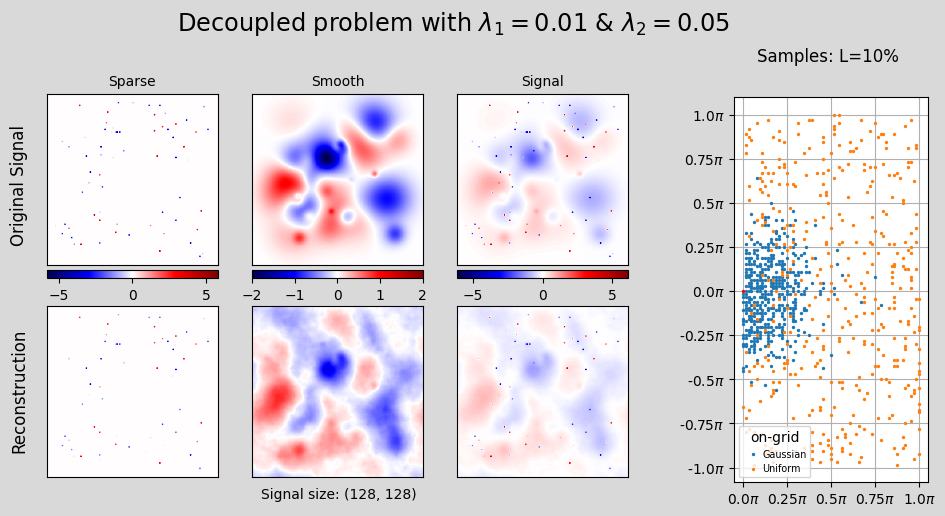

Button(description='SAVE', style=ButtonStyle())

Output()

In [39]:
sparse_rcstr_, smooth_rcstr_, signal_rcstr_ = map(
    lambda x: x.reshape((N,N)), (x1_, x2_, x1_ + x2_)
)

fig = plot_results(
    [sparse_signal, smooth_signal],
    [sparse_rcstr_, smooth_rcstr_],
    lambda1,
    lambda2,
    op,
    coupled,
)

save_widget(fig, lambda1, lambda2, op, psnr, coupled)

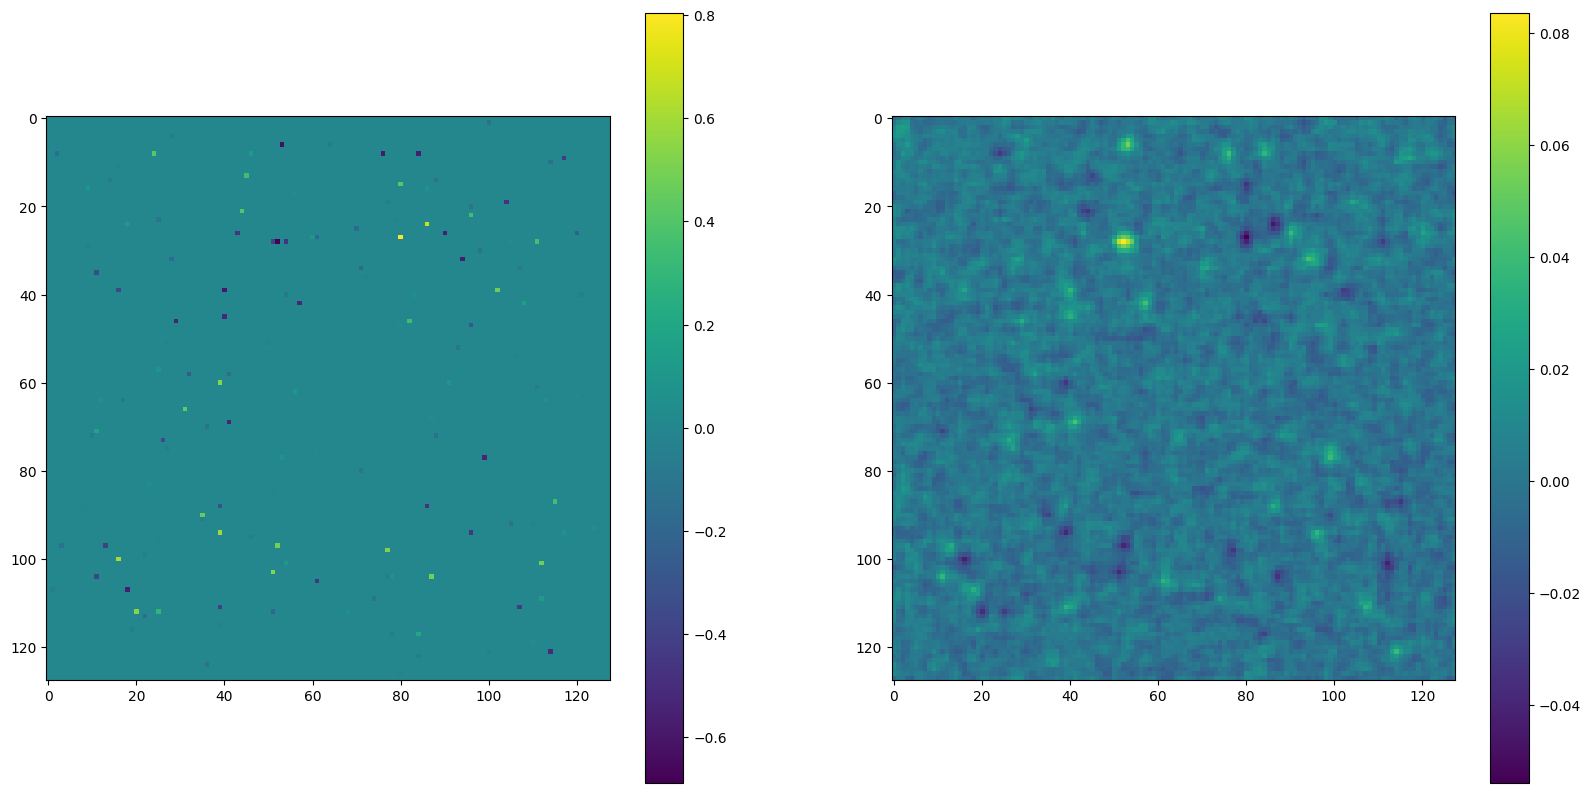

In [40]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(sparse_rcstr - sparse_rcstr_, interpolation="none")
plt.colorbar()
plt.subplot(122)
plt.imshow(smooth_rcstr - smooth_rcstr_, interpolation="none")
plt.colorbar();

evaluer cost function
temps de reconstruction (fixe taille image, lambda, 10 operations, ensuite varier taille image (512, si marche pas 256))

mettre image côte à côte (chaque taille) avec diff